<a href="https://colab.research.google.com/github/dinaomidvartehrani/Applied-AI-/blob/main/Semi%20Supervised%20Learnng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
data = pd.read_csv('/content/adult.csv')

# **Data Pre-Processing**

In [3]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [4]:
data.loc[(data['workclass'] == '?') & (data['occupation'] != '?')]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income


In [5]:
data = data.loc[(data['workclass'] != '?') & (data['occupation'] != '?')]

In [6]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [7]:
data.loc[data['native.country'] == '?']

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K
18,22,Private,119592,Assoc-acdm,12,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,2824,40,?,>50K
65,60,Self-emp-inc,226355,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,2415,70,?,>50K
86,39,Self-emp-not-inc,218490,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,?,>50K
87,43,Federal-gov,156996,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,2415,55,?,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32428,45,Private,199590,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,?,<=50K
32459,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32476,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32498,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K


In [8]:
data = data.loc[(data['native.country'] != '?')]

In [9]:
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
object_describe=data.describe(include=["object"]).T
object_describe

,count,unique,top,freq
workclass,30162,7,Private,22286
education,30162,16,HS-grad,9840
marital.status,30162,7,Married-civ-spouse,14065
occupation,30162,14,Prof-specialty,4038
relationship,30162,6,Husband,12463
race,30162,5,White,25933
sex,30162,2,Male,20380
native.country,30162,41,United-States,27504
income,30162,2,<=50K,22654


In [12]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [13]:
column_types = data.dtypes
# Print the column types
print(column_types)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


In [14]:
object_columns=data.select_dtypes(include=["object"]).columns
for i in range(len(object_columns)):
    print("----- {}-----".format(object_columns[i]))
    print(data[object_columns[i]].value_counts())

----- workclass-----
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64
----- education-----
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64
----- marital.status-----
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64
----- occupation-----
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Ad

In [15]:
data.loc[data['capital.loss'] == 0]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1519,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


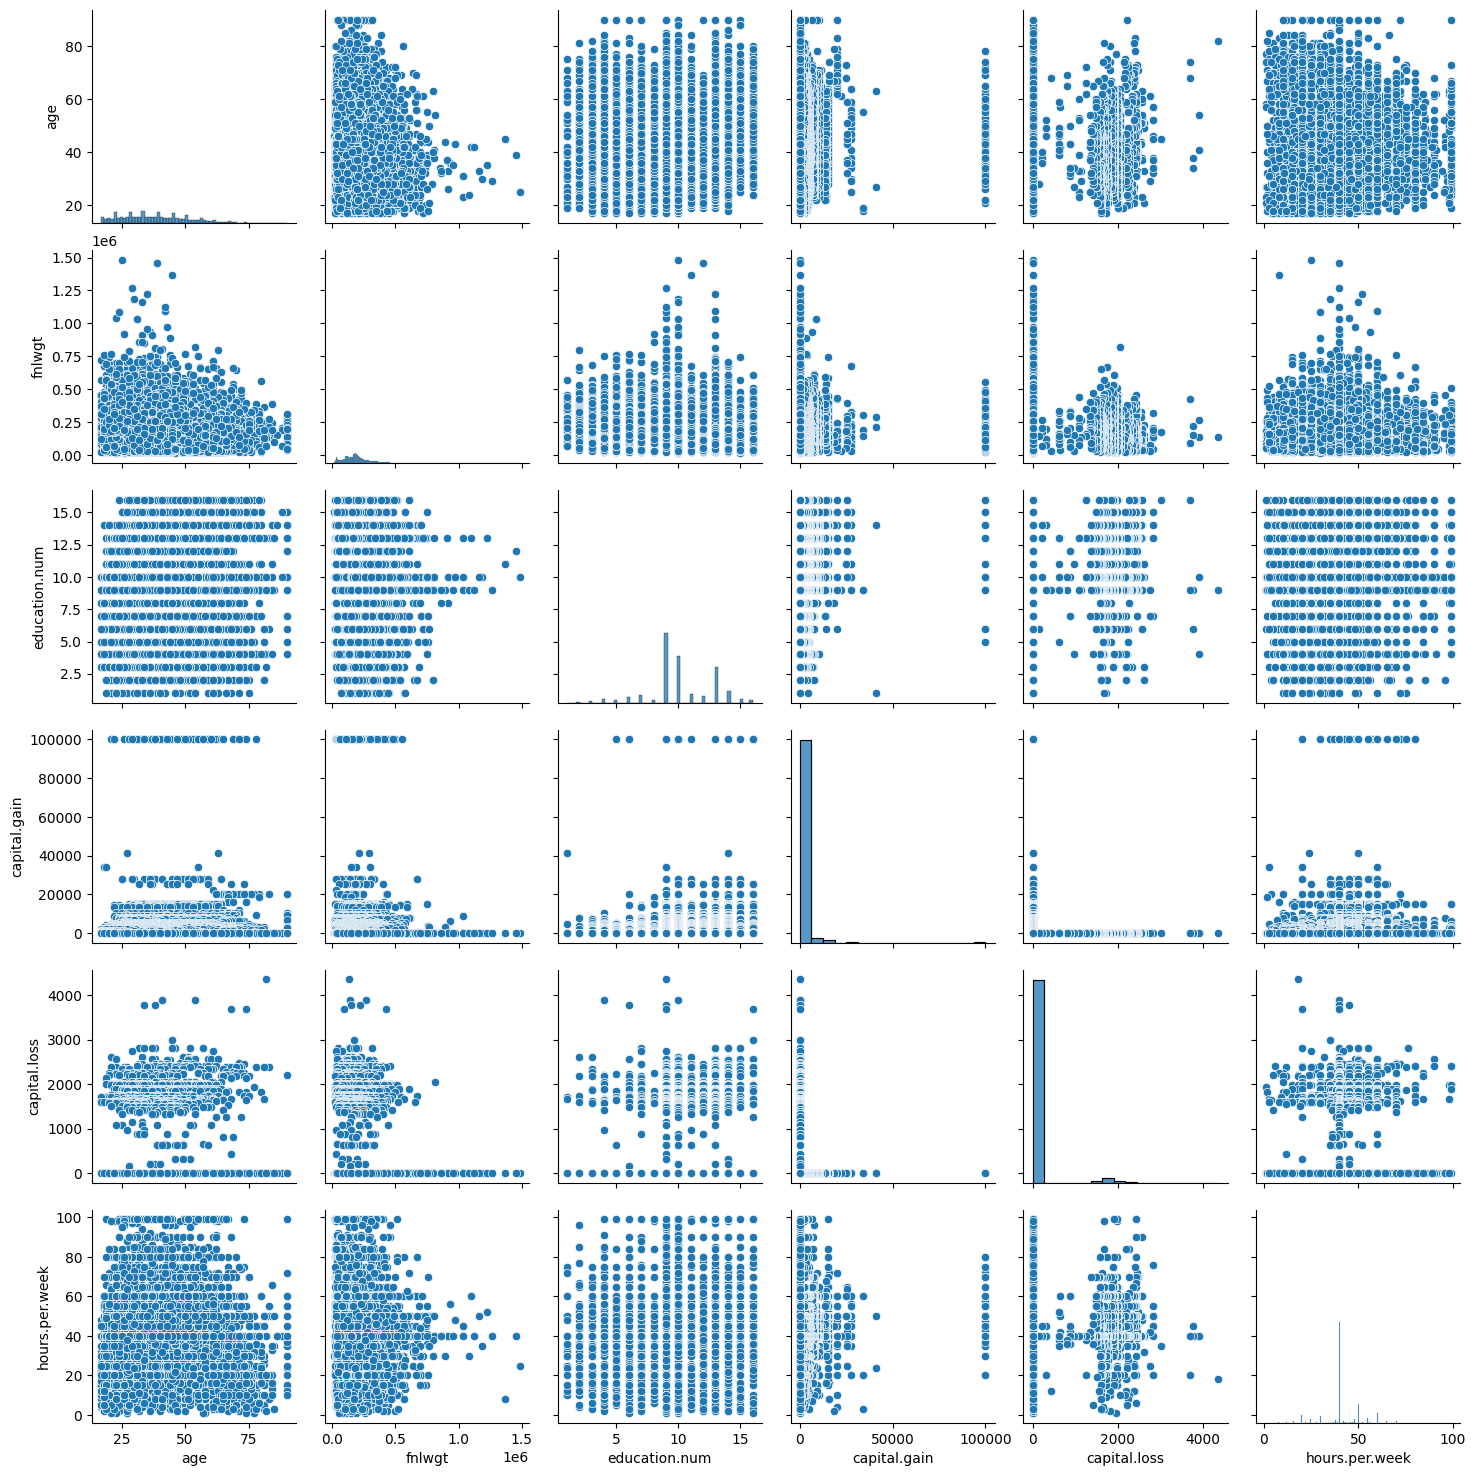

In [16]:
sns.pairplot(data)

In [17]:
data["education"].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [18]:
data.corr()

<ipython-input-18-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886
education.num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000


<ipython-input-19-d0dace2d397a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()
<ipython-input-19-d0dace2d397a>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr,dtype=np.bool)


<Axes: >

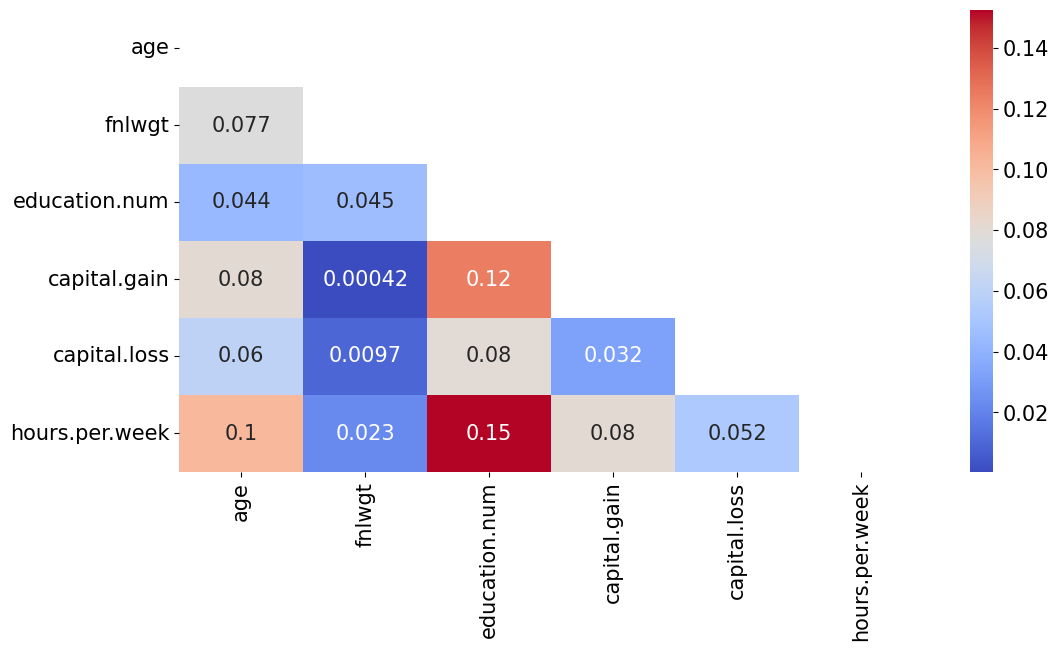

In [19]:
plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 15})
corr=data.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask)

In [20]:
loss_withoutzero=data.loc[data["capital.loss"]!=0,:]
loss_withoutzero

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,37,Private,262409,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,213,45,United-States,<=50K
1515,38,Private,173047,Bachelors,13,Divorced,Adm-clerical,Unmarried,Asian-Pac-Islander,Female,0,213,40,Philippines,<=50K
1516,40,Private,65866,Some-college,10,Divorced,Tech-support,Unmarried,White,Female,0,213,40,United-States,<=50K
1517,36,Private,204590,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,0,213,40,United-States,<=50K


In [21]:
gain_withoutzero=data.loc[data["capital.gain"]!=0,:]
gain_withoutzero

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1519,54,Self-emp-inc,166459,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
1520,52,Private,152234,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,99999,0,40,Japan,>50K
1521,53,Self-emp-inc,263925,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,40,United-States,>50K
1522,52,Private,118025,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,99999,0,50,United-States,>50K
1523,46,Private,370119,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,20,Private,59948,9th,5,Never-married,Adm-clerical,Unmarried,Black,Female,114,0,20,United-States,<=50K
4227,39,Private,151023,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,114,0,45,United-States,<=50K
4228,33,Private,175412,9th,5,Divorced,Craft-repair,Unmarried,White,Male,114,0,55,United-States,<=50K
4229,38,Private,254439,10th,6,Widowed,Transport-moving,Unmarried,Black,Male,114,0,40,United-States,<=50K


In [22]:
data["sex"].value_counts()

Male      20380
Female     9782
Name: sex, dtype: int64

In [23]:
data["relationship"].value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [24]:
data["marital.status"].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital.status, dtype: int64

In [25]:
data["occupation"].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

In [26]:
data["income"].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

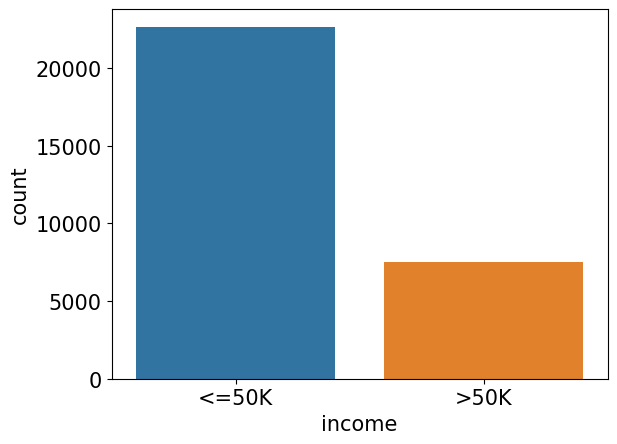

In [27]:
# Assuming you have a dataframe named 'df' with an "income" column
sns.countplot(data, x="income")
plt.show()

In [28]:
data["education"].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [29]:
data["native.country"].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Iran                             42
Taiwan                           42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [30]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['sex'] == 'Male')])

# Calculate the percentage
percentage = (specific_samples / total_samples) * 100

# Print the percentage
print(f"The percentage of samples with income >50K and their gender is Male: {percentage:.2f}%")

The percentage of samples with income >50K and their gender is Male: 21.21%


In [31]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['sex'] == 'Female')])

# Calculate the percentage
percentage = (specific_samples / total_samples) * 100

# Print the percentage
print(f"The percentage of samples with income >50K and their gender is Female: {percentage:.2f}%")

The percentage of samples with income >50K and their gender is Female: 3.69%


In [32]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '<=50K') & (data['sex'] == 'Male')])

# Calculate the percentage
percentage = (specific_samples / total_samples) * 100

# Print the percentage
print(f"The percentage of samples with income <=50K and their gender is Male: {percentage:.2f}%")

The percentage of samples with income <=50K and their gender is Male: 46.36%


In [33]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '<=50K') & (data['sex'] == 'Female')])

# Calculate the percentage
percentage = (specific_samples / total_samples) * 100

# Print the percentage
print(f"The percentage of samples with income <=50K and their gender is Female: {percentage:.2f}%")

The percentage of samples with income <=50K and their gender is Female: 28.74%


In [34]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['sex'] == 'Male') & (data['age'] <= 30) & (data['relationship'] == 'Unmarried')])

# Calculate the percentage
percentage = (specific_samples / total_samples) * 100

# Print the percentage
print(f"The percentage of samples with income >50K and their gender is Male and they are less than 30 years old: {percentage:.2f}%")

The percentage of samples with income >50K and their gender is Male and they are less than 30 years old: 0.02%


In [35]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['sex'] == 'Female') & (data['age'] <= 30) & (data['relationship'] == 'Unmarried')])

# Calculate the percentage
percentage = (specific_samples / total_samples) * 100

# Print the percentage
print(f"The percentage of samples with income >50K and their gender is Male and they are less than 30 years old: {percentage:.2f}%")

The percentage of samples with income >50K and their gender is Male and they are less than 30 years old: 0.02%


In [36]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['marital.status'] == 'Divorced')])
# Calculate the percentage
percentage = (specific_samples / total_samples) * 100
# Print the percentage
print(f"The percentage of samples with income >50K and their marital status is divorced: {percentage:.2f}%")

The percentage of samples with income >50K and their marital status is divorced: 1.50%


In [37]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['marital.status'] == 'Never-married')])
# Calculate the percentage
percentage = (specific_samples / total_samples) * 100
# Print the percentage
print(f"The percentage of samples with income >50K and their marital status is Never-married: {percentage:.2f}%")

The percentage of samples with income >50K and their marital status is Never-married: 1.56%


In [38]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['education'] == 'HS-grad')])
# Calculate the percentage
percentage = (specific_samples / total_samples) * 100
# Print the percentage
print(f"The percentage of samples with income >50K and their education status is HS-grad: {percentage:.2f}%")

The percentage of samples with income >50K and their education status is HS-grad: 5.36%


In [39]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['education'] == 'Some-college')])
# Calculate the percentage
percentage = (specific_samples / total_samples) * 100
# Print the percentage
print(f"The percentage of samples with income >50K and their education status is Some-college: {percentage:.2f}%")

The percentage of samples with income >50K and their education status is Some-college: 4.43%


In [40]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['education'] == 'Bachelors')])
# Calculate the percentage
percentage = (specific_samples / total_samples) * 100
# Print the percentage
print(f"The percentage of samples with income >50K and their education status is Bachelors: {percentage:.2f}%")

The percentage of samples with income >50K and their education status is Bachelors: 7.05%


In [41]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['education'] == 'Masters')])
# Calculate the percentage
percentage = (specific_samples / total_samples) * 100
# Print the percentage
print(f"The percentage of samples with income >50K and their education status is Masters: {percentage:.2f}%")

The percentage of samples with income >50K and their education status is Masters: 3.04%


In [42]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['education'] == 'Doctorate')])
# Calculate the percentage
percentage = (specific_samples / total_samples) * 100
# Print the percentage
print(f"The percentage of samples with income >50K and their education status is Doctorate: {percentage:.2f}%")

The percentage of samples with income >50K and their education status is Doctorate: 0.93%


In [43]:
# Count the number of samples with the specific features
total_samples = len(data)
specific_samples = len(data[(data['income'] == '>50K') & (data['education'] == 'Prof-school')])
# Calculate the percentage
percentage = (specific_samples / total_samples) * 100
# Print the percentage
print(f"The percentage of samples with income >50K and their education status is Prof-school: {percentage:.2f}%")

The percentage of samples with income >50K and their education status is Prof-school: 1.35%


In [44]:
from sklearn.utils import resample

# Split the dataset based on the target variable
majority_class = data[data['income'] == '<=50K']
minority_class = data[data['income'] == '>50K']

# Determine the desired number of samples for the majority class
desired_majority_samples = len(majority_class) - 10162

# Downsample the majority class
downsampled_majority = resample(majority_class,
                                n_samples=desired_majority_samples,
                                replace=False,
                                random_state=42)

# Combine the downsampled majority class with the minority class
balanced_dataset = pd.concat([downsampled_majority, minority_class])

In [45]:
balanced_dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
11343,22,Private,48347,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
31212,23,Private,234302,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,0,40,United-States,<=50K
23603,37,Private,95855,11th,7,Divorced,Handlers-cleaners,Not-in-family,White,Female,0,0,40,United-States,<=50K
14923,24,Self-emp-not-inc,172047,Assoc-acdm,12,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
31200,31,Private,184307,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32536,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
32539,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
32547,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


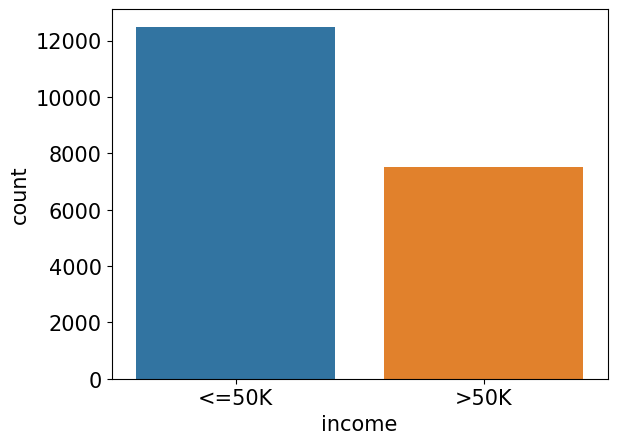

In [46]:
sns.countplot(balanced_dataset, x="income")
plt.show()

# **Supervised learning Classification with Decision Trees**

In [47]:
# Identify the target variable and features
target = 'income'
features = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status',
            'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss',
            'hours.per.week', 'native.country']

# Split the dataset into features (X) and target variable (y)
X = balanced_dataset[features]
y = balanced_dataset[target]

# Split the data into training, validation, and test sets (60% training, 20% validation, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Perform one-hot encoding for categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)
X_test_encoded = pd.get_dummies(X_test)

# Align the training, validation, and test sets to ensure the same columns are present
X_train_encoded, X_val_encoded = X_train_encoded.align(X_val_encoded, join='outer', axis=1, fill_value=0)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Create and train the decision tree classifier
classifier = DecisionTreeClassifier(max_depth = 11)
classifier.fit(X_train_encoded, y_train)

# Make predictions on the validation set
y_val_pred = classifier.predict(X_val_encoded)

# Calculate the accuracy of the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")

# Make predictions on the test set
y_test_pred = classifier.predict(X_test_encoded)

# Calculate the accuracy of the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")

Validation Accuracy: 0.81675
Test Accuracy: 0.80925


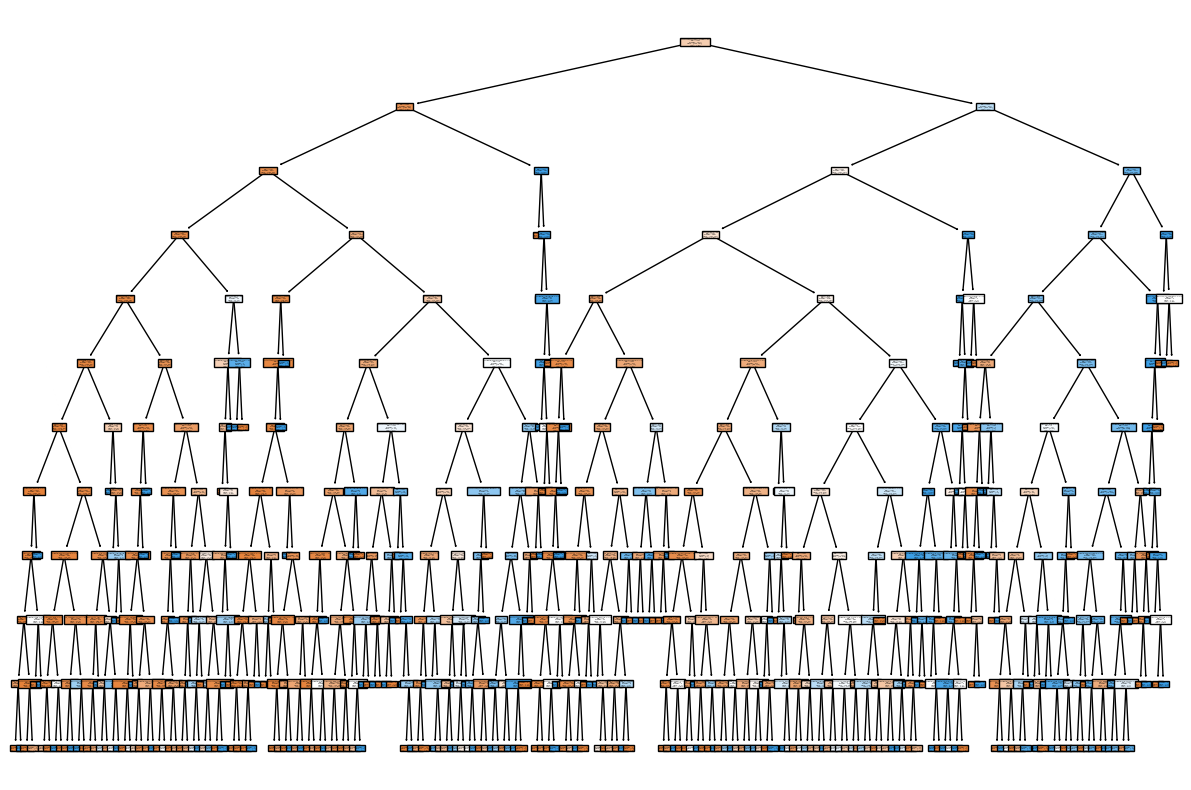

In [48]:
from sklearn.tree import plot_tree
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(classifier, feature_names=X_train_encoded.columns, class_names=classifier.classes_, filled=True)
plt.show()

In [49]:
# Print classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

       <=50K       0.87      0.81      0.84      2516
        >50K       0.72      0.80      0.76      1484

    accuracy                           0.81      4000
   macro avg       0.80      0.81      0.80      4000
weighted avg       0.82      0.81      0.81      4000



In [50]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix

array([[2049,  467],
       [ 296, 1188]])

Text(0.5, 427.9555555555555, 'Predicted label')

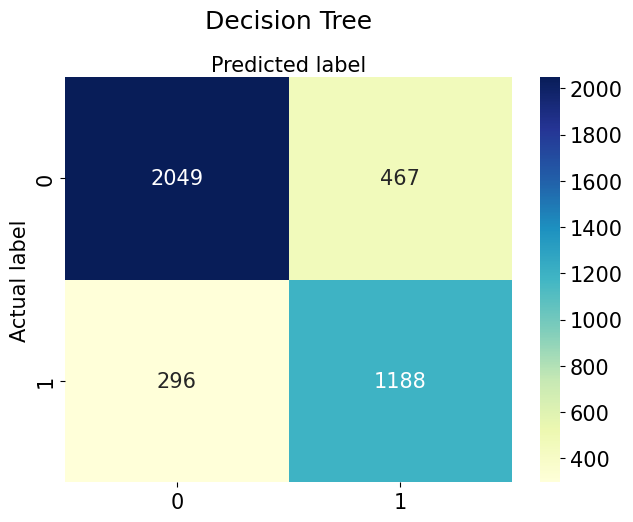

In [51]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Decision Tree', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# **Semi-supervised learning Classification with Decision Trees**

Perform one-hot encoding on the entire dataset before splitting it into labeled and unlabeled portions. This ensures consistency in the encoding across both datasets.

In [52]:
balanced_dataset = balanced_dataset.reset_index().drop('index', axis=1)

In [53]:
balanced_dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,22,Private,48347,Bachelors,13,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
1,23,Private,234302,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,0,40,United-States,<=50K
2,37,Private,95855,11th,7,Divorced,Handlers-cleaners,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,24,Self-emp-not-inc,172047,Assoc-acdm,12,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
4,31,Private,184307,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,54,Private,337992,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,>50K
19996,34,Private,160216,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,55,United-States,>50K
19997,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
19998,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [54]:
# Split the data based on income
df_high = balanced_dataset[balanced_dataset['income'] == '>50K']
df_low = balanced_dataset[balanced_dataset['income'] == '<=50K']

# Split each income group into 50-50 train and test sets
df_high_labeled, df_high_unlabeled = train_test_split(df_high, train_size=0.5, random_state=42)
df_low_labeled, df_low_unlabeled = train_test_split(df_low, train_size=0.5, random_state=42)

# Concatenate the train sets and test sets
labeled_df = pd.concat([df_high_labeled, df_low_labeled])
unlabeled_df = pd.concat([df_high_unlabeled, df_low_unlabeled])

In [55]:
concat_result = pd.concat([labeled_df, unlabeled_df], ignore_index=True)

In [56]:
concat_result

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,60,Private,355865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1,27,Private,66473,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
2,29,Local-gov,376302,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,35,Nicaragua,>50K
3,44,Private,165492,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
4,40,Private,287008,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,Germany,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,74,Private,101590,Prof-school,15,Widowed,Adm-clerical,Not-in-family,Black,Female,0,0,20,United-States,<=50K
19996,25,Private,390316,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,<=50K
19997,46,Private,148254,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States,<=50K
19998,24,Private,196269,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,0,40,United-States,<=50K


In [57]:
balanced_encoded = pd.get_dummies(concat_result)

In [60]:
balanced_encoded

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,60,355865,14,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,27,66473,13,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,29,376302,11,0,0,35,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,165492,10,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,40,287008,15,15024,0,55,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,74,101590,15,0,0,20,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
19996,25,390316,5,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
19997,46,148254,9,0,0,60,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
19998,24,196269,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [66]:
# Split the dataframe into two new dataframes of labeled and unlabeled
labeled_df = balanced_encoded[:10000]
unlabeled_df = balanced_encoded[10000:20000]

In [67]:
labeled_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,60,355865,14,0,0,50,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,27,66473,13,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,29,376302,11,0,0,35,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,44,165492,10,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,40,287008,15,15024,0,55,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40,297396,10,0,0,60,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
9996,50,121411,8,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
9997,32,249409,9,0,0,40,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
9998,19,104844,10,0,0,15,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [68]:
unlabeled_df

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
10000,40,86912,16,0,0,50,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10001,46,164023,10,0,0,70,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
10002,52,108083,14,0,0,50,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
10003,58,306233,13,15024,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
10004,43,26915,11,0,0,45,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,74,101590,15,0,0,20,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
19996,25,390316,5,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
19997,46,148254,9,0,0,60,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
19998,24,196269,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [70]:
# Split the dataframe into two new dataframes of labeled and unlabeled
labeled_df_before_encode = concat_result[:10000]
unlabeled_before_encode = concat_result[10000:20000]

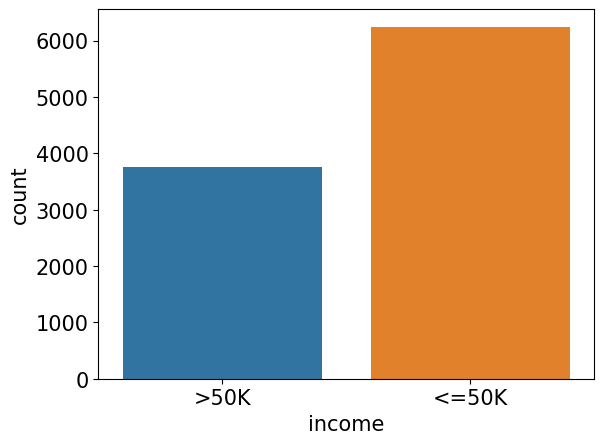

In [71]:
sns.countplot(labeled_df_before_encode, x="income")
plt.show()

In [72]:
labeled_df_before_encode

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,60,Private,355865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
1,27,Private,66473,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
2,29,Local-gov,376302,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,35,Nicaragua,>50K
3,44,Private,165492,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K
4,40,Private,287008,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,Germany,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,40,Private,297396,Some-college,10,Separated,Exec-managerial,Unmarried,White,Female,0,0,60,United-States,<=50K
9996,50,Private,121411,12th,8,Divorced,Transport-moving,Not-in-family,White,Male,0,0,40,United-States,<=50K
9997,32,Federal-gov,249409,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K
9998,19,Private,104844,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,15,United-States,<=50K


In [73]:
unlabeled_before_encode

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
10000,40,State-gov,86912,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
10001,46,State-gov,164023,Some-college,10,Married-civ-spouse,Protective-serv,Husband,Black,Male,0,0,70,United-States,>50K
10002,52,Local-gov,108083,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
10003,58,Private,306233,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,40,United-States,>50K
10004,43,Private,26915,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,74,Private,101590,Prof-school,15,Widowed,Adm-clerical,Not-in-family,Black,Female,0,0,20,United-States,<=50K
19996,25,Private,390316,9th,5,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,Mexico,<=50K
19997,46,Private,148254,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States,<=50K
19998,24,Private,196269,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0,0,40,United-States,<=50K


In [77]:
# Split the features and the target variable in the labeled dataset
X_labeled = labeled_df.drop(['income_<=50K', 'income_>50K'], axis=1)
y_labeled = labeled_df_before_encode['income']

# Split the features and the target variable in the unlabeled dataset
X_unlabeled = unlabeled_df.drop(['income_<=50K', 'income_>50K'], axis=1)
y_unlabeled = unlabeled_before_encode['income']


# Initialize the labeled data and labels for semi-supervised learning
labeled_data_ss = labeled_df.copy()
labeled_labels_ss = y_labeled.copy()

y_unlabled_df = y_unlabeled.to_frame()

# Set the number of iterations
n_iterations = 4

# Semi-supervised learning loop
for i in range(n_iterations):

    print(f"Iteration {i+1}")

    # Train a decision tree on the labeled data
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(X_labeled, labeled_labels_ss)
    # print(tree.classes_)
    # Predict labels for the unlabeled data
    predicted_labels = tree.predict(X_unlabeled)
    column_names = ['income']
    predicted_labels_df = pd.DataFrame(predicted_labels, columns=column_names)


    probabilities = tree.predict_proba(X_unlabeled)
    confidence_threshold = 0.95  # Adjust this threshold as needed
    confident_indices = []
    labels = []
    index = 0
    for sample in probabilities:
      if sample[0] > confidence_threshold:
        labels.append(0)
        confident_indices.append(index)
      if sample[1] > confidence_threshold:
        labels.append(1)
        confident_indices.append(index)
      index += 1
    # print(labels)
    # print(confident_indices)



    # Add the confident predictions to the labeled data
    labeled_data_ss = pd.concat([labeled_data_ss, unlabeled_df.iloc[confident_indices]],ignore_index=True)
    labeled_labels_ss = pd.concat([labeled_labels_ss, y_unlabeled.iloc[confident_indices]],ignore_index=True)

    # Update the encoding for the newly added labeled data only
    # print(X_unlabeled)
    X_labeled = pd.concat([X_labeled, X_unlabeled.iloc[confident_indices]],ignore_index=True)

    # Evaluate the accuracy of the combined dataset
    accuracy = accuracy_score(y_unlabeled, predicted_labels)
    print("Accuracy:", accuracy)

    # Update the unlabeled data by removing the confidently predicted samples
    X_unlabeled = X_unlabeled.drop(X_unlabeled.index[confident_indices]).reset_index(drop=True)
    y_unlabeled = y_unlabeled.drop(y_unlabeled.index[confident_indices]).reset_index(drop=True)

Iteration 1
Accuracy: 0.7916
Iteration 2
Accuracy: 0.6714819850441877
Iteration 3
Accuracy: 0.6706984667802385
Iteration 4
Accuracy: 0.6701873935264054
